In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:

result_dir_ablation_all = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1017_ablation_variational_sampling"
benchmarks_ablation_all = os.listdir(result_dir_ablation_all)
result_dir_orig = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_sampling_1"
benchmarks = os.listdir(result_dir_orig)
result_dir_ablation_pdbbind = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1104_ablation_pdbbind_variational_sampling"
benchmarks_pdbbind = os.listdir(result_dir_ablation_pdbbind)
result_dir_ablation_ncaa = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1104_ablation_ncaa_variational_sampling"
benchmarks_ncaa = os.listdir(result_dir_ablation_ncaa)  

In [4]:
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

model_list = ["UNAAGI"]
for benchmark in benchmarks_ablation_all:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_ablation_all, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI_ablation_all'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)
        

for benchmark in benchmarks_pdbbind:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_ablation_pdbbind, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI_ablation_pdbbind'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)
        
for benchmark in benchmarks:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_orig, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)

for benchmark in benchmarks_ncaa:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_ablation_ncaa, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI_ablation_ncaa'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)

# uaa_result = pd.DataFrame({
#     "benchmark_name": ['CP2', 'PUMA', 'CP2', 'PUMA', 'CP2', 'PUMA'],
#     "model": ['UNAAGI_ablation_1014', 'UNAAGI_ablation_1014', 'UNAAGI_ablation_1017', 'UNAAGI_ablation_1017', 'UNAAGI', 'UNAAGI'],
#     "spearmanr_pred": [0.2009, 0.1838, 0.1038, 0.147, 0.3307, 0.224],
#     "ndcg_pred": [0, 0, 0, 0, 0, 0]
# })

# result_folder = pd.concat([result_folder, uaa_result], ignore_index=True)

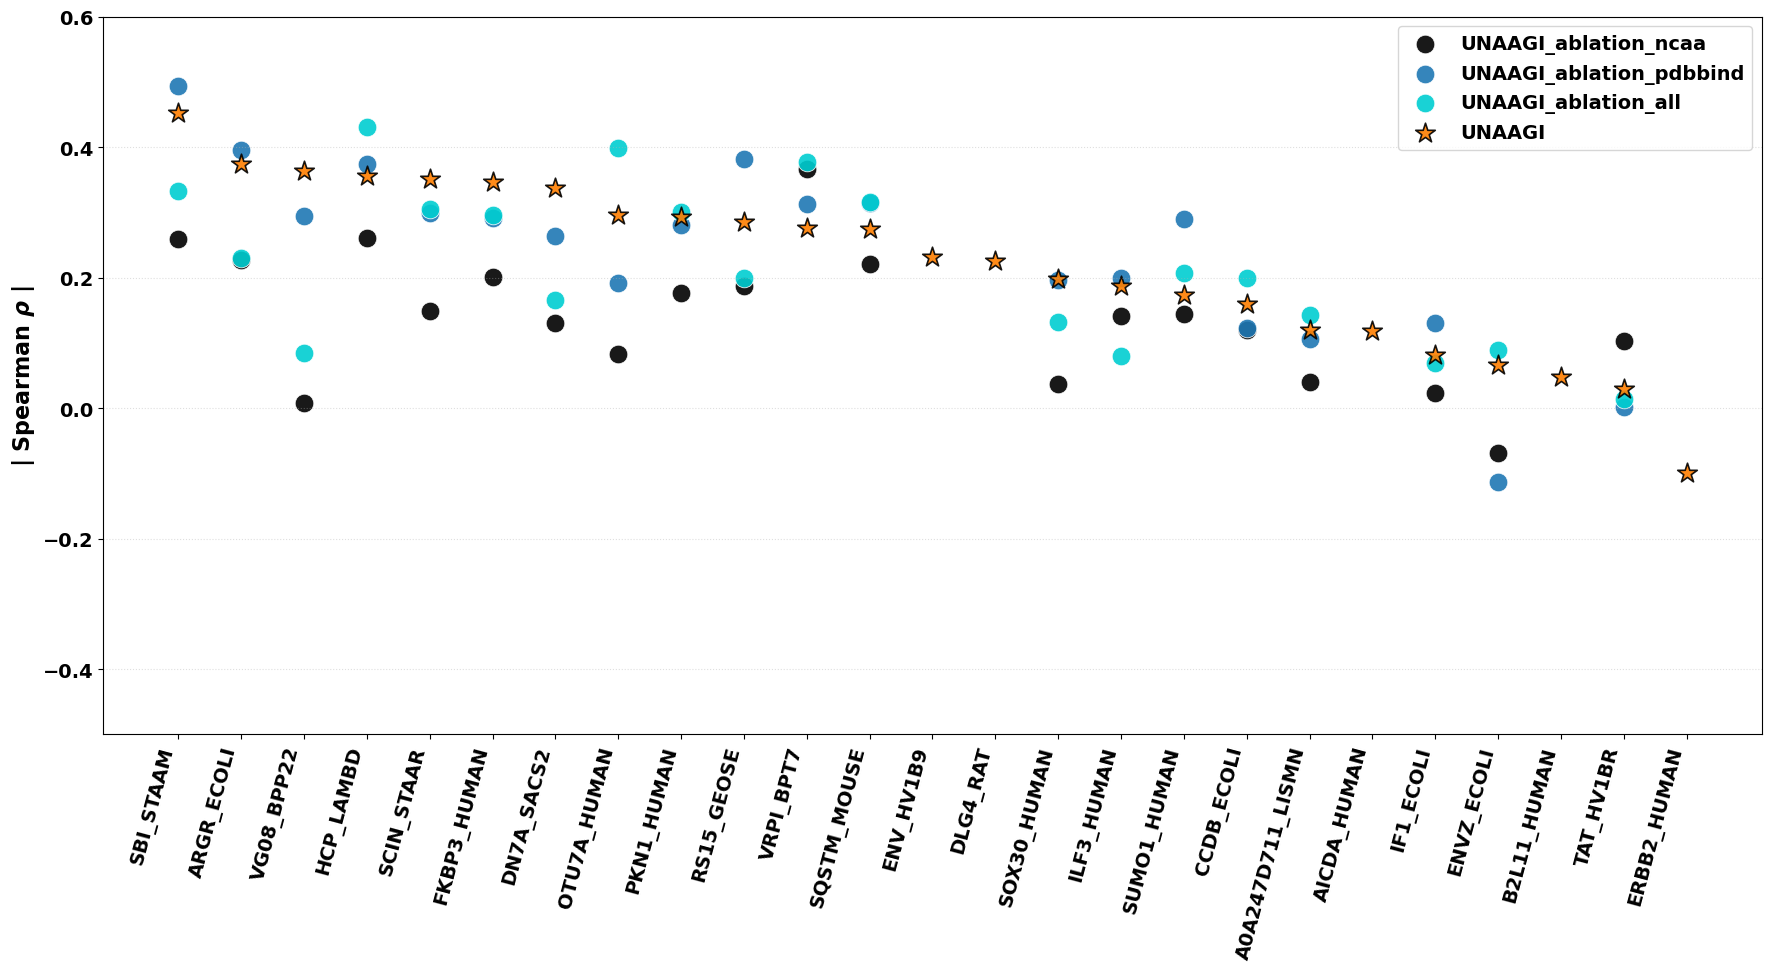

In [5]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "UNAAGI_ablation_ncaa",
    "UNAAGI_ablation_pdbbind",
    'UNAAGI_ablation_all',
    'UNAAGI',
]
colors = {
    "UNAAGI_ablation_ncaa": "black",     # black
    "UNAAGI_ablation_pdbbind": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI_ablation_1017": "#ff1493",                  # bright red (highlight)
    "UNAAGI": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI_ablation_all": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    if m == ref_model:
        y = piv_sorted[m].values
        plt.scatter(
            x, y, marker="*",
            s=220,
            alpha=0.9,
            label=m,
            edgecolor="black",
            linewidth=1.2,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )
    else:
        y = piv_sorted[m].values
        plt.scatter(
            x, y,
            s=180,
            alpha=0.9,
            label=m,
            edgecolor="white",
            linewidth=0.6,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.5, 0.6)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()




plt.show()


In [7]:
# take the rows containing nan values in spearmanr_pred
# nan_rows = result_folder[result_folder['spearmanr_pred'].isna()]

In [11]:
# keep the benchmarks only available for all model


,benchmark_name,model,spearmanr_pred,ndcg_pred
20,ILF3_HUMAN,UNAAGI_ablation_pdbbind,0.199581,0.800380
21,DN7A_SACS2,UNAAGI_ablation_pdbbind,0.263531,0.868366
22,PKN1_HUMAN,UNAAGI_ablation_pdbbind,0.280458,0.882611
23,SQSTM_MOUSE,UNAAGI_ablation_pdbbind,0.314173,0.670422
24,ARGR_ECOLI,UNAAGI_ablation_pdbbind,0.395309,0.903915
25,SCIN_STAAR,UNAAGI_ablation_pdbbind,0.299623,0.750350
26,SOX30_HUMAN,UNAAGI_ablation_pdbbind,0.196132,0.825788
27,CCDB_ECOLI,UNAAGI_ablation_pdbbind,0.123413,0.780353
28,TAT_HV1BR,UNAAGI_ablation_pdbbind,0.001860,0.559459
29,FKBP3_HUMAN,UNAAGI_ablation_pdbbind,0.291354,0.826265


In [12]:
# Keep only benchmarks that have results for all models
# First, let's see which benchmarks have complete data

# Get all unique models
all_models = result_folder['model'].unique()
print(f"All models: {all_models}")
print(f"Number of models: {len(all_models)}")

# Create a pivot to see which benchmarks have data for all models
benchmark_coverage = result_folder.pivot_table(
    index='benchmark_name',
    columns='model',
    values='spearmanr_pred',
    aggfunc='count'
)

# Find benchmarks with complete data (no NaN values)
complete_benchmarks = benchmark_coverage.dropna().index.tolist()
print(f"\nBenchmarks with complete data for all models: {len(complete_benchmarks)}")
print(complete_benchmarks)

# Filter result_folder to keep only complete benchmarks
result_folder_complete = result_folder[result_folder['benchmark_name'].isin(complete_benchmarks)].copy()

print(f"\nFiltered data shape: {result_folder_complete.shape}")
print(f"Original data shape: {result_folder.shape}")

All models: ['UNAAGI_ablation_all' 'UNAAGI_ablation_pdbbind' 'UNAAGI'
 'UNAAGI_ablation_ncaa']
Number of models: 4

Benchmarks with complete data for all models: 20
['A0A247D711_LISMN', 'ARGR_ECOLI', 'CCDB_ECOLI', 'DN7A_SACS2', 'ENVZ_ECOLI', 'FKBP3_HUMAN', 'HCP_LAMBD', 'IF1_ECOLI', 'ILF3_HUMAN', 'OTU7A_HUMAN', 'PKN1_HUMAN', 'RS15_GEOSE', 'SBI_STAAM', 'SCIN_STAAR', 'SOX30_HUMAN', 'SQSTM_MOUSE', 'SUMO1_HUMAN', 'TAT_HV1BR', 'VG08_BPP22', 'VRPI_BPT7']

Filtered data shape: (80, 4)
Original data shape: (85, 4)


In [13]:
# Calculate average values across benchmarks for each model
average_results = result_folder_complete.groupby('model').agg({
    'spearmanr_pred': 'mean',
    'ndcg_pred': 'mean'
}).reset_index()

# Rename columns for clarity
average_results.columns = ['model', 'avg_spearmanr', 'avg_ndcg']

# Sort by average spearmanr (descending)
average_results = average_results.sort_values('avg_spearmanr', ascending=False)

print("Average performance across complete benchmarks:")
print(average_results)
print(f"\nNumber of benchmarks used for averaging: {len(complete_benchmarks)}")

Average performance across complete benchmarks:
                     model  avg_spearmanr  avg_ndcg
0                   UNAAGI       0.250877  0.790587
3  UNAAGI_ablation_pdbbind       0.241327  0.780399
1      UNAAGI_ablation_all       0.218397  0.778550
2     UNAAGI_ablation_ncaa       0.140422  0.755277

Number of benchmarks used for averaging: 20


In [14]:
# Extract model names and their average spearmanr values
model_names = average_results['model'].tolist()
avg_spearmanr_values = average_results['avg_spearmanr'].tolist()
avg_ndcg_values = average_results['avg_ndcg'].tolist()

print("Model names:")
print(model_names)
print("\nAverage Spearman ρ values:")
print(avg_spearmanr_values)
print("\nAverage NDCG values:")
print(avg_ndcg_values)

# Create a nice summary display
print("\n" + "="*60)
print("SUMMARY: Average Performance on Complete Benchmarks")
print("="*60)
for i, (model, spr, ndcg) in enumerate(zip(model_names, avg_spearmanr_values, avg_ndcg_values), 1):
    print(f"{i}. {model:30s} | Spearman ρ: {spr:.4f} | NDCG: {ndcg:.4f}")
print("="*60)

Model names:
['UNAAGI', 'UNAAGI_ablation_pdbbind', 'UNAAGI_ablation_all', 'UNAAGI_ablation_ncaa']

Average Spearman ρ values:
[0.2508765663069198, 0.24132664421629008, 0.2183972886875305, 0.14042215562175966]

Average NDCG values:
[0.790587186230528, 0.7803990447376397, 0.778549778461686, 0.7552767062429453]

SUMMARY: Average Performance on Complete Benchmarks
1. UNAAGI                         | Spearman ρ: 0.2509 | NDCG: 0.7906
2. UNAAGI_ablation_pdbbind        | Spearman ρ: 0.2413 | NDCG: 0.7804
3. UNAAGI_ablation_all            | Spearman ρ: 0.2184 | NDCG: 0.7785
4. UNAAGI_ablation_ncaa           | Spearman ρ: 0.1404 | NDCG: 0.7553
